### Required Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset

In [11]:
df = pd.read_csv("dataset\heights.csv")
df

,name,height
0,mohan,5.90
1,maria,5.20
2,sakib,5.10
3,tao,5.50
4,virat,4.90
5,khusbu,5.40
6,dmitry,6.20
7,selena,6.50
8,john,7.10
9,imran,11.50


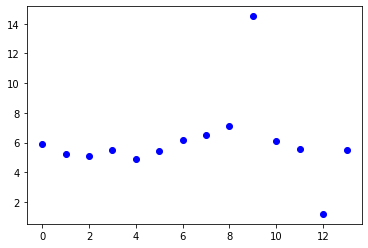

In [3]:
x= list(range(0,14))
y=df['height']
plt.scatter(x, y ,c ="blue")

In [4]:
df1= df.copy()
lst = [] 
for i in np.arange(0.0,14.0,1.0):
    lst.append(i)
print(lst)

df1['x'] = pd.DataFrame(lst)

[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0]


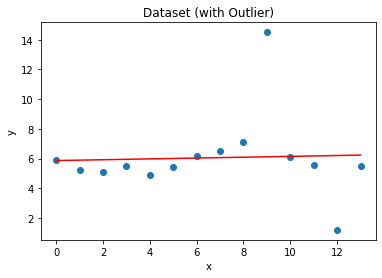

In [5]:
x = df1['x']
y = df1['height']
plt.scatter(x,y)
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color = 'red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Dataset (with Outlier)')
plt.show()

In [6]:
df.shape

(14, 2)

<AxesSubplot:xlabel='height', ylabel='Count'>

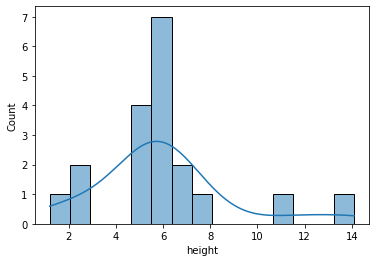

In [12]:
sns.histplot(df['height'], kde=True)

## How to Find Quantiles?
Sample question: Find the number in the following set of data where 20 percent of values fall below it, and 80 percent fall above:
1 3 5 6 9 11 12 13 19 21 22 32 35 36 45 44 55 68 79 80 81 88 90 91 92 100 112 113 114 120 121 132 145 146 149 150 155 180 189 190

1. Step 1: Order the data from smallest to largest. The data in the question is already in ascending order.
2. Step 2: Count how many observations you have in your data set. this particular data set has 40 items.
3. Step 3: Convert any percentage to a decimal for “q”. We are looking for the number where 20 percent of the values fall below it, so convert that to .2.
4. Step 4: Insert your values into the formula:
ith observation = q (n + 1)

ith observation = .2 (40 + 1) = 8.2

Answer: The ith observation is at 8.2, so we round down to 8 (remembering that this formula is an estimate). 

The 8th number in the set is 13, which is the number where 20 percent of the values fall below it.

#detect outliers based on weight
Q1 = df1.height.quantile(0.25)
Q3 = df1.height.quantile(0.75)
Q1, Q3

IQR = Q3 - Q1
print(IQR)

lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

In [13]:
#detect outliers based on weight
Q1 = df.height.quantile(0.25)
Q3 = df.height.quantile(0.75)
Q1, Q3

IQR = Q3 - Q1
print(IQR)

lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

1.1999999999999993


(3.3500000000000014, 8.149999999999999)

In [14]:
new = df[(df.height>lower_limit)&(df.height<upper_limit)]
new

,name,height
0,mohan,5.90
1,maria,5.20
2,sakib,5.10
3,tao,5.50
4,virat,4.90
5,khusbu,5.40
6,dmitry,6.20
7,selena,6.50
8,john,7.10
10,jose,6.10


## show outliers

using iqr lower and upper 

In [7]:
df[(df.height<lower_limit)|(df.height>upper_limit)]

,name,height
9,imran,11.5
12,yoseph,1.2
13,binod,2.5
16,rakib,2.5
17,methew,14.1


In [15]:
new_df= df[(df.height>lower_limit)&(df.height<upper_limit)]
new_df

,name,height
0,mohan,5.90
1,maria,5.20
2,sakib,5.10
3,tao,5.50
4,virat,4.90
5,khusbu,5.40
6,dmitry,6.20
7,selena,6.50
8,john,7.10
10,jose,6.10


C:\Users\HP\Desktop\ML_Course\MachineLearning_Practices\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='height'>

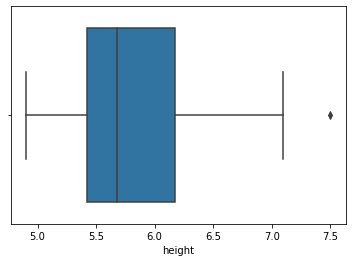

In [16]:
sns.boxplot(new_df['height'])